# Github日常使用说明

******
## [目录](目录)

[1.下载R包](1.下载R包)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.1 SRA](#1.1-Windows下载)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.2 Linux服务器下载](#1.2-Linux服务器下载)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.3 Rstudio下载和安装github上R包](#1.3-Rstudio下载和安装github上R包)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.4 Github代码传输](#1.4-Github代码传输)<br>
[2.R包制作](2.R包制作)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.1 准备工作](#2.1-准备工作)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2 开发R包流程](#2.2-开发R包流程)<br>
[3.R包上传](3.R包上传)<br>
[4.完整代码](4.完整代码)<br>
[5.输出文件](5.输出文件)<br>
[6.参考网站](6.参考网站)

## 1.下载R包

以[scAPAmod包](https://github.com/BMILAB/scAPAmod)为例：
### 1.1 Windows下载：
进入上面scAPAmod包，点击Code，可下载scAPAmod压缩包（ZIP）
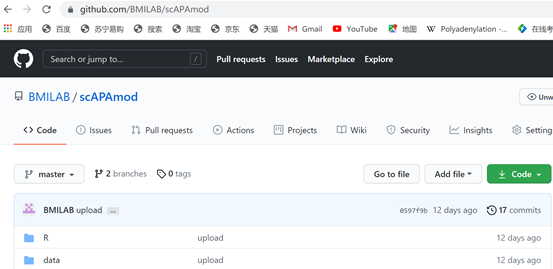
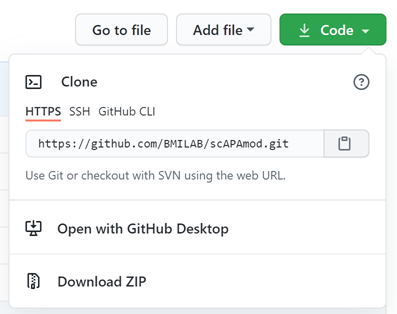

### 1.2 Linux服务器下载
同样点击Code，下载scAPAmod压缩包（ZIP）：
解压zip压缩包：

In [ ]:
$ unzip scAPAmod-master.zip

或解压到指定位置

In [ ]:
$ unzip -d 位置scAPAmod-master.zip

到文件的目录下：<br>
cd 位置<br>
可参照使用说明打开R project文件使用。

### 1.3 Rstudio下载和安装github上R包

a.直接安装

In [ ]:
install.packages(“devtools”)
require(devtools)
install_github(“BMILAB/scAPAmod”)
library(scAPAmod)

b.ZIP文件本地安装

In [ ]:
install.packages(“scAPAmod解压的地址”，repos=NULL，type=“source”)
library(scAPAmod)

### 1.4 Github代码传输
>📰扩展阅读：<br>
> 1) [Linux下github的下载和使用](https://blog.csdn.net/derkampf/article/details/52869958/) <br>

## 2.R包制作

### 2.1 准备工作：
+ 准备整理好的函数<br>
+ 在Rstudio中创建一个R project项目<br>
+ 下载并安装devtools包<br>
+ 下载并安装roxygen2包<br>

### 2.2 开发R包流程：
+ R文件<br>
创建新的文件夹R，将所有R函数文件放入此文件夹中，否则roxygen2的document文件无法写入；<br>
+ 书写函数文档<br>
在加载了roxygen2包之后，可以在函数上方用 #' 符号为函数添加文档。<br>
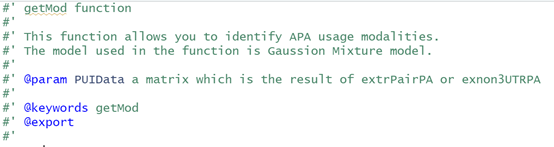<br>
函数文档分几个部分：<br>
a.	标题，只能占用一行，不长于80个字符；<br>
b.	详细介绍，空一行之后，可以占用多行，第二段开始会放入document的details中，每行同样不能超过80个字符；<br>
c.	examples，在文档中添加@examples或@example后添加R语句，即为文档的例子；<br>
d.	返回值，在文档中添加@return之后添加返回值解释；<br>
e.	引用其他文档段，添加@describein或@rdname域，并加上文档名，即可直接引用其他的文档段。这两个域的区别是，添加@describein之后仍然可以添加其他的文档内容。而使用@rdname的话，在此域后面，只能用域来添加文档，不能添加description文档。所有没有域名的文档都必须添加到@rdname的上方；<br>
f.	添加外部函数，如果当前函数使用了第三方包的函数，则有两种方法来使用此函数。第一种，是在roxygen注释中添加@import pkg。这种方法会在R包的NAMESPACE文件中添加import域，在加载R包时，第三方包的所有函数都会被导入。在使用函数时必须用pkg::fun的方法，以防函数名冲突。第二种方法，是在roxygen注释中添加@importFrom pkg fun。这种方法会在NAMESPACE文件中添加importFrom域，在使用时可以直接使用函数名，就像在.GlobalEnv中创建的函数一样。这里推荐第二种引用方法，因为可以大幅减少函数冲突；<br>
g.	决定是否导出函数。并不是所有定义了的函数都要让用户直接使用。对于那些你想让用户直接使用的函数，需要在NAMESPACE文件中添加export域：export(func)。这里的处理方法是在roxygen注释中添加@export。之后，此函数会被自动添加到NAMESPACE中。在对包进行测试时，要多export一些函数，避免重复安装包导致的繁琐工作；<br>
h.	其它roxygen域：@format: 说明格式。@param param description: 参数说明等。<br>
+ 添加数据<br>
如果想在包中内嵌一些功能数据或者示例数据：<br>
a.	可以先将函数导入项目全局环境，然后使用devtools::use_data(), devtools::create()，并在DESCRIPTION中添加LazyData: true；<br>
b.	添加新文件夹data，将数据放入，直接使用load(“数据名”)即可加载。<br>
+ 进行测试<br>
在所有函数都书写完成之后，可以在项目中对包的功能进行测试，可以使用devtools::load_all()函数，这样可以导入包中的所有函数，并进行调用。<br>
+ 添加函数文档， DESCRIPTION文件， NAMESPACE文件<br>
使用devtools::document()为R包生成文档。每个R文件的文档会分别以file.Rd格式存在man文件夹中。同时在R包根目录下会生成DESCRIPTION和NAMESPACE文件。<br>
<font color="red">📌注意：<br> a. NAMESPACE指定了R包导出的函数和引用的第三方包或第三方函数。 <br> b. DESCRIPTION是函数的描述文档。其中包含了描述，作者，许可证等重要信息。标题中的这三类文件不要手动生成，否则roxygen2包无法使用document()函数对其进行修改，必须先将这些文档删除。不过有一部分信息只能手动修改：<br>
Author信息直接在DESCRIPTION文件中的Author@R域中修改<br>
包的版本号直接在DESCRIPTION文件中的Version域进行修改
</font> <br>
>📰扩展阅读：<br>
> 1)  [R包编写详细教程](http://personalbioinformatics.blogspot.com/2019/01/r.html) <br>

+ R包组装<br>
方法一：在R包的所有内容都生成好之后，使用devtools::build()命令组装R包。这将在R包项目所在的目录下生成一个.tar.gz格式的压缩包，这就是最终封装好的R包。<br>
方法二：点击rstudio的build→install and Restart→Check，成功后会自动生成一个.tar.gz格式的压缩包。<br>
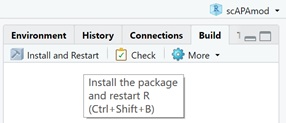

+ vignettes——R包说明文档制作<br>
a.	新建RMD文件<br>
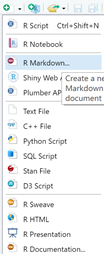<br>
b.	选择文件格式（HTML或PDF）<br>
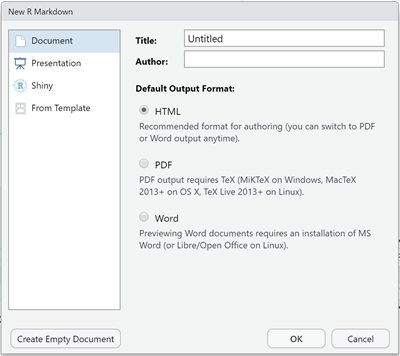<br>
c.	填写信息<br>
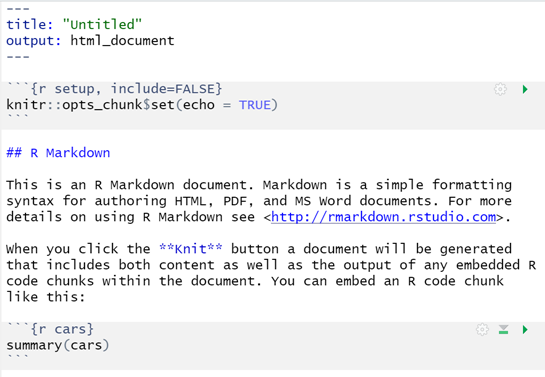<br>
>📰扩展阅读：<br>
> 1) [Introduction (rstudio.com)](https://rmarkdown.rstudio.com/lesson-1.html) <br>

## 3. R包上传
+ 下载Github桌面版<br>
>📰扩展阅读：<br>
> 1) [Github Desktop](https://desktop.github.com/) <br>
+ 登录GitHub，新建repository，添加readme文档<br>
+ 将新建repository拷贝在桌面版Github里
<br><font color="red">📌注意：选择对应的repository，并放在能找到的位置，这样就将新建的repository拷贝到本地电脑。</font> <br>
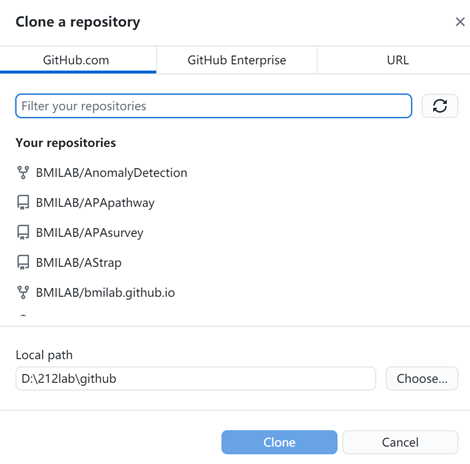<br>
+ 找到对应Local path，点击进入文件夹，将之前的文件复制到该文件夹下<br>
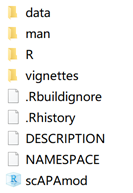<br>
+ 复制后Github桌面版自动检测到变化<br>
在summary处填写上传文档整体为什么内容，description填写具体上传了哪些内容，这两处可中文也可英文描述。<br>
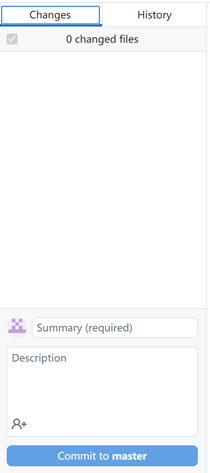<br>
+ 之后点击下图红框完成整个R包的上传，如果之后文件中有内容变化，也可采用同样的方法上传。<br>
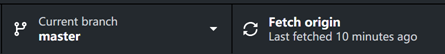<br>
+ 增加分支<br>
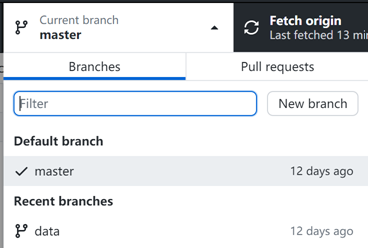<br>
<font color="red">📌注意：上传数据一次不大于100M，大文件可在网页版进行上传，或分批上传。</font> <br>

## 4.完整代码

In [ ]:
#Linux下载之后解压
$ unzip scAPAmod-master.zip
$ unzip -d 位置scAPAmod-master.zip

#Rstudio安装R包
install.packages(“devtools”)
require(devtools)
install_github(“BMILAB/scAPAmod”)
library(scAPAmod)

#本地R包安装
install.packages(“scAPAmod解压的地址”，repos=NULL，type=“source”)
library(scAPAmod)

## 5.输出文件
| 步骤 | 输出文件 | 文件作用 |
 :-: | :-: | :-:
| R包组装 | myPackage_0.1.0.tar.gz | R包压缩文件 |

## 6.参考网站
[1] [Github 简明教程](https://www.runoob.com/w3cnote/git-guide.html)<br>
[2] [如何使用 GitHub？](https://www.zhihu.com/question/20070065)<br>
[3] [Git和GitHub使用教程](https://www.jianshu.com/p/296d22275cdd)<br>
[4] [R包编写详细教程](http://personalbioinformatics.blogspot.com/2019/01/r.html)<br>
[5] [如何快速写一个R包](https://www.bioinfo-scrounger.com/archives/546/)<br>
[6] [制作R包指南](https://zhuanlan.zhihu.com/p/62977994)